# Decision Making
### By Parth Agrawal (240905088) Group-2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [3]:
# Loading the Dataset
data = pd.read_csv('Threats (1).csv')
data

,Unnamed: 0,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,40000,40001,0.012996,tcp,-,FIN,16,18,1540,1644,...,1,6,0,0,0,5,7,0,Normal,0
1,40001,40002,0.004119,tcp,-,FIN,12,12,1064,2260,...,1,1,0,0,0,3,8,0,Normal,0
2,40002,40003,0.000988,udp,dns,CON,2,2,146,178,...,1,2,0,0,0,7,2,0,Normal,0
3,40003,40004,3.415787,tcp,ssh,FIN,230,238,24344,29556,...,1,1,0,0,0,4,1,0,Normal,0
4,40004,40005,0.193943,tcp,-,FIN,72,74,4238,63618,...,1,5,0,0,0,6,12,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135336,175336,175337,0.000009,udp,dns,INT,2,0,114,0,...,13,24,0,0,0,24,24,0,Generic,1
135337,175337,175338,0.505762,tcp,-,FIN,10,8,620,354,...,1,2,0,0,0,1,1,0,Shellcode,1
135338,175338,175339,0.000009,udp,dns,INT,2,0,114,0,...,3,13,0,0,0,3,12,0,Generic,1
135339,175339,175340,0.000009,udp,dns,INT,2,0,114,0,...,14,30,0,0,0,30,30,0,Generic,1


## Data Preprocessing

In [4]:
# Drop redundant columns
data = data.drop(columns=["Unnamed: 0", "id"], errors='ignore')

# Identify categorical columns
categorical_columns = ["proto", "service", "state", "attack_cat"]

unique_ids = {}

def unique_item_code (item):
    if item != "":
        sum_of_ords = sum([ord(val) for val in item])
        length = len(item)
        ord_first = ord(item[0])
        ord_last = ord(item[-1])
        unique_id = sum_of_ords+length+ord_first*2+ord_last
    else: unique_id = 1

    if unique_id not in unique_ids.keys():
        unique_ids[unique_id] = item

    return unique_id

# Frequency encode categorical variables
for col in categorical_columns:
    data[col + '_freq'] = [unique_item_code(item) for item in data[col].values]
    data.drop(col, axis=1, inplace=True)

## Data Training

In [5]:
def train_decision_tree_with_kfold(data):
    kf = KFold(n_splits=10, shuffle=False)
    titles = list(data)[1:-1]
    accuracy_list = []
    X= data[titles].values
    y= data['attack_cat_freq'].values

    clf = DecisionTreeClassifier(min_samples_leaf=int(len(data)/300))

    n= 0
    print("Cross validation for each fold:")
    for train_index, test_index in kf.split(X, y):
        clf.fit(X[train_index], y[train_index])
        score = clf.score(X[test_index], y[test_index])
        accuracy_list.append(score)
        print("\nModel iteration {0}:".format(n+1))
        train_predictions = clf.predict(X[train_index])
        train_accuracy = accuracy_score(y[train_index], train_predictions)
        test_predictions = clf.predict(X[test_index])
        total_predictions = clf.predict(X)
        total_accuracy = accuracy_score(y, total_predictions)
        print("Accuracies on:\nTraining Data: {0}\nTesting Data (Score): {1}\nTotal Data: {2}".format(train_accuracy, score, total_accuracy))
        n += 1
    return X,y

In [6]:
X,y=train_decision_tree_with_kfold(data)

Cross validation for each fold:

Model iteration 1:
Accuracies on:
Training Data: 0.80727550366977
Testing Data (Score): 0.898928703361655
Total Data: 0.8164414331207838

Model iteration 2:
Accuracies on:
Training Data: 0.8220791908511005
Testing Data (Score): 0.7277966602630412
Total Data: 0.8126510074552427

Model iteration 3:
Accuracies on:
Training Data: 0.8225799830879998
Testing Data (Score): 0.7180434461356583
Total Data: 0.8121264066321366

Model iteration 4:
Accuracies on:
Training Data: 0.8253794937893553
Testing Data (Score): 0.7022314171715679
Total Data: 0.8130647771185376

Model iteration 5:
Accuracies on:
Training Data: 0.8188938238360686
Testing Data (Score): 0.7447170090143342
Total Data: 0.8114761971612445

Model iteration 6:
Accuracies on:
Training Data: 0.8185408063575985
Testing Data (Score): 0.7535835673119551
Total Data: 0.8120451304482751

Model iteration 7:
Accuracies on:
Training Data: 0.8069651169473019
Testing Data (Score): 0.8497857248411408
Total Data: 0.8

## Plotting the Tree

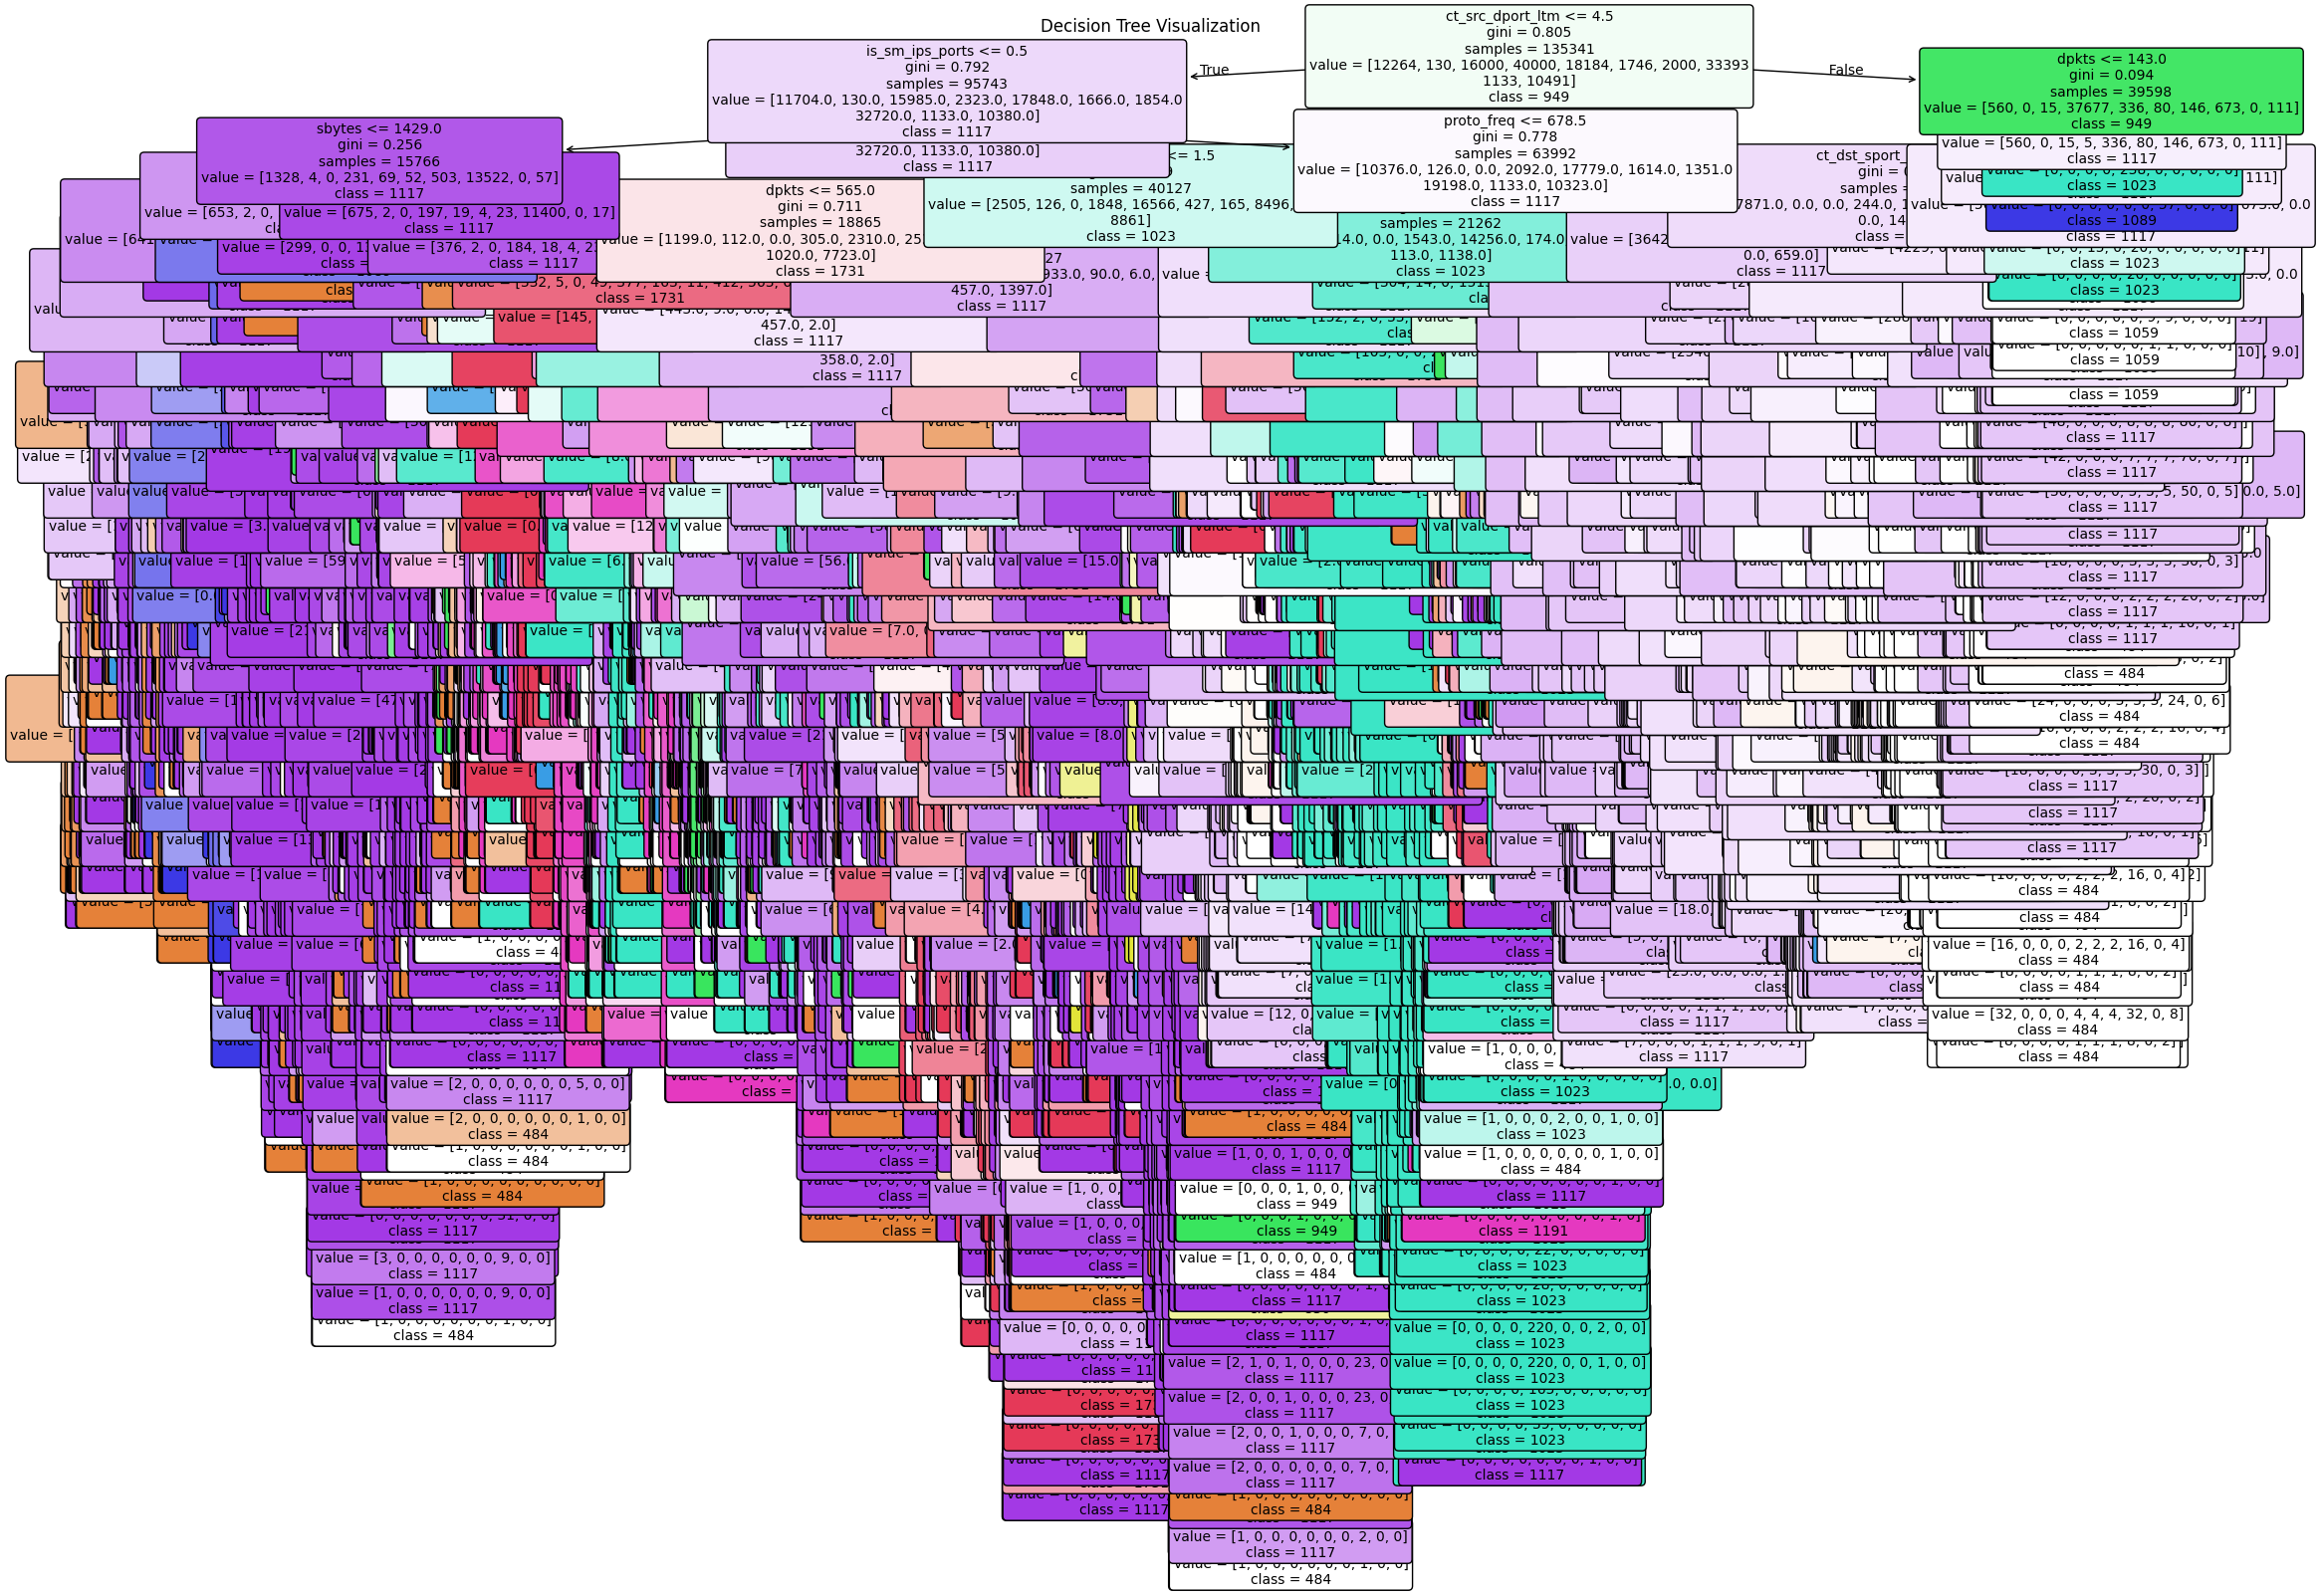

The model's accuracy on the full dataset is 88.26%


In [7]:
def plot_decision_tree(clf, feature_names, class_names):
    """
    Plot a decision tree visualization.

    Args:
        clf (DecisionTreeClassifier): Trained decision tree model.
        feature_names (list): List of feature names.
        class_names (list): List of class names.
    """
    plt.figure(figsize=(25, 20))
    tree.plot_tree(
        clf,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        fontsize=10
    )
    plt.title("Decision Tree Visualization")
    plt.show()

# Train the DecisionTreeClassifier on the entire dataset for visualization
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Extract feature names and class names
feature_names = data.drop(columns=["label"], errors="ignore").columns.tolist()
class_names = list(map(str, np.unique(y)))

# Visualize the decision tree
plot_decision_tree(clf, feature_names, class_names)

# Calculate and print model accuracy
score = clf.score(X, y)
print(f"The model's accuracy on the full dataset is {score * 100:.2f}%")